In [2]:
!pip install pandas

In [3]:
!pip install numpy


In [4]:
!pip install backtrader


In [5]:
!pip install finta


In [6]:
!pip install QuantLib


In [7]:
!pip install matplotlib


In [8]:
!pip install seaborn


In [9]:
!pip install scipy


In [10]:
!pip install quantstats


In [11]:
!pip install riskfolio-lib


In [12]:
!pip install yfinance


In [1]:
import pandas as pd       # Data handling (e.g., price data, returns)
import numpy as np        # Numerical operations (e.g., mean, standard deviation)
import backtrader as bt  # Full-featured backtesting framework
from finta import TA    # Technical Analysis library (e.g., moving averages, RSI)
import QuantLib as ql   # Quantitative finance models, pricing, and calculations

import matplotlib.pyplot as plt   # Plotting results like returns or drawdowns
import seaborn as sns             # Enhanced visualizations (optional)
from scipy.stats import norm      # Used for probability calculations in finance
import quantstats
import riskfolio as rp
import yfinance as yf

In [58]:
ticker = "^NSEI"  # Symbol for NIFTY50 index

# Fetch data using yfinance
data = yf.download(
    tickers=ticker,
    interval="5m",       # 5-minute timescale
    period="1mo",         # Maximum period available for 5-minute data
    progress=False       # To suppress download progress
)

data

Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Datetime,,,,,
2024-11-28 03:45:00+00:00,24277.500000,24316.349609,24271.750000,24278.750000,0
2024-11-28 03:50:00+00:00,24273.849609,24287.400391,24268.150391,24278.599609,0
2024-11-28 03:55:00+00:00,24277.349609,24289.500000,24265.849609,24273.500000,0
2024-11-28 04:00:00+00:00,24279.349609,24280.050781,24266.349609,24276.550781,0
2024-11-28 04:05:00+00:00,24276.000000,24281.750000,24267.000000,24279.900391,0
...,...,...,...,...,...
2024-12-27 09:35:00+00:00,23816.300781,23822.250000,23804.300781,23821.349609,0
2024-12-27 09:40:00+00:00,23807.699219,23820.650391,23801.900391,23817.400391,0


In [59]:
data.columns = data.columns.droplevel(1)
data

Price,Close,High,Low,Open,Volume
Datetime,,,,,
2024-11-28 03:45:00+00:00,24277.500000,24316.349609,24271.750000,24278.750000,0
2024-11-28 03:50:00+00:00,24273.849609,24287.400391,24268.150391,24278.599609,0
2024-11-28 03:55:00+00:00,24277.349609,24289.500000,24265.849609,24273.500000,0
2024-11-28 04:00:00+00:00,24279.349609,24280.050781,24266.349609,24276.550781,0
2024-11-28 04:05:00+00:00,24276.000000,24281.750000,24267.000000,24279.900391,0
...,...,...,...,...,...
2024-12-27 09:35:00+00:00,23816.300781,23822.250000,23804.300781,23821.349609,0
2024-12-27 09:40:00+00:00,23807.699219,23820.650391,23801.900391,23817.400391,0
2024-12-27 09:45:00+00:00,23806.800781,23814.550781,23803.800781,23807.650391,0


In [64]:
aapl_bt_data = yf.download('AAPL', start='2016-01-01', end='2020-01-01')
aapl_bt_data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-04,23.860580,23.865111,23.101844,23.240002,270597600
2016-01-05,23.262650,23.973824,23.194704,23.951175,223164000
2016-01-06,22.807411,23.185649,22.619427,22.775703,273829600
2016-01-07,21.844839,22.678318,21.840310,22.349910,324377600
2016-01-08,21.960346,22.447297,21.915049,22.320464,283192000
...,...,...,...,...,...
2019-12-24,68.898689,69.048965,68.571495,69.000488,48478800
2019-12-26,70.265663,70.282631,69.002914,69.031998,93121200


In [65]:
aapl_bt_data.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [66]:
aapl_bt_data.columns = aapl_bt_data.columns.droplevel(1)

In [67]:
aapl_bt_data

Price,Close,High,Low,Open,Volume
Date,,,,,
2016-01-04,23.860580,23.865111,23.101844,23.240002,270597600
2016-01-05,23.262650,23.973824,23.194704,23.951175,223164000
2016-01-06,22.807411,23.185649,22.619427,22.775703,273829600
2016-01-07,21.844839,22.678318,21.840310,22.349910,324377600
2016-01-08,21.960346,22.447297,21.915049,22.320464,283192000
...,...,...,...,...,...
2019-12-24,68.898689,69.048965,68.571495,69.000488,48478800
2019-12-26,70.265663,70.282631,69.002914,69.031998,93121200
2019-12-27,70.238991,71.249679,69.831810,70.558922,146266000


In [68]:
class Strategy(bt.Strategy):
    def __init__(self):
        self.sma = bt.indicators.SMA(self.data.close, period=20)
        self.std = bt.indicators.StandardDeviation(self.data.close, period=20)
        self.upper_band = self.sma + (2 * self.std)
        self.lower_band = self.sma - (2 * self.std)
        self.position_flag = 0
        self.entry_price = None
        self.highest_price = None  # For trailing stop

    def next(self):
        if self.position_flag == 1:
            # Update highest price
            self.highest_price = max(self.highest_price, self.data.close[0])

            # Trailing stop loss condition 
            if self.data.close[0] < self.highest_price * 0.98:
                self.sell()  # Sell if price drops 2% below the highest price
                self.position_flag = 0
                self.entry_price = None

        # Buy condition
        if self.data.close[0] < self.lower_band[0] and self.position_flag == 0:
            self.position_flag = 1
            self.buy()
            self.entry_price = self.data.close[0]
            self.highest_price = self.data.close[0]  # Initialize highest price

        # Sell condition based on SMA
        elif self.data.close[0] >= self.sma[0] and self.position_flag == 1:
            self.sell()  # Sell if price crosses SMA
            self.position_flag = 0
            self.entry_price = None
            self.highest_price = None

In [69]:
data_feed = bt.feeds.PandasData(dataname=aapl_bt_data)

<IPython.core.display.Javascript object>

C:\Users\sriga\AppData\Local\Programs\Python\Python312\Lib\site-packages\backtrader\plot\plot.py:821: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.mpyplot.show()
C:\Users\sriga\AppData\Local\Temp\ipykernel_11872\2261908721.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


<Figure size 1000x600 with 0 Axes>

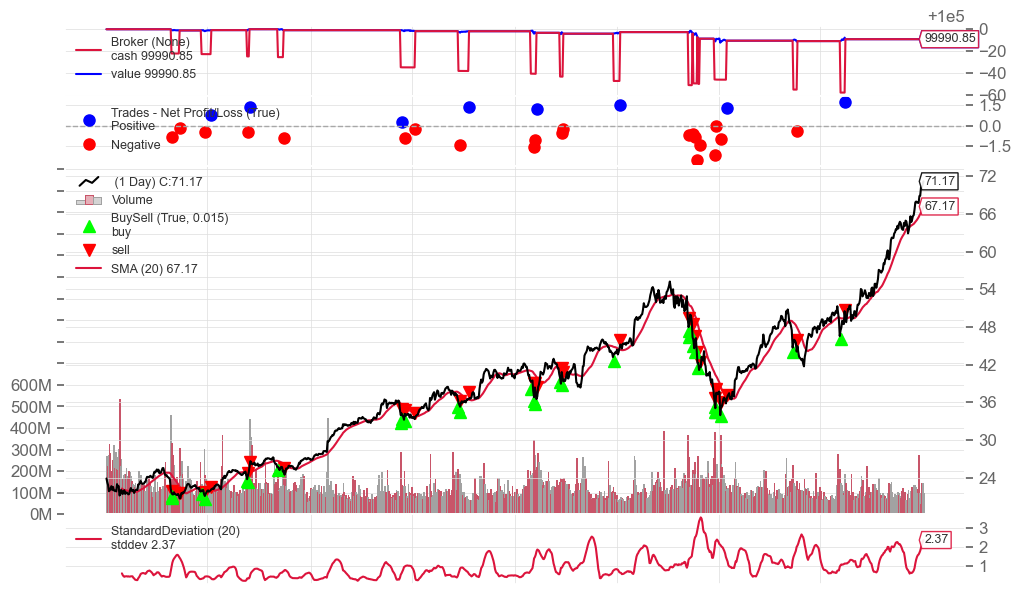

In [70]:
# Set up the backtest engine (Cerebro)
cerebro = bt.Cerebro()

# Add the data feed and the strategy
cerebro.adddata(data_feed)
cerebro.addstrategy(Strategy)

cerebro.broker.setcash(100000)  # Initial cash
cerebro.broker.setcommission(commission=0.001)  # Commission per trade

# Run the backtest
cerebro.run()

import matplotlib.pyplot as plt

# After running cerebro.run()
%matplotlib inline
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
cerebro.plot()
plt.show()

In [71]:
final_cash = cerebro.broker.get_cash()
print(f"Final cash value: {final_cash}")

Final cash value: 99990.8511130661


In [72]:
class ShortingStrategy(bt.Strategy):
    def __init__(self):
        # Define Bollinger Bands and SMA
        self.sma = bt.indicators.SMA(self.data.close, period=20)
        self.std = bt.indicators.StandardDeviation(self.data.close, period=20)
        self.upper_band = self.sma + (2 * self.std)
        self.lower_band = self.sma - (2 * self.std)

        # Track position status and price details
        self.position_flag = 0
        self.entry_price = None
        self.lowest_price = None  # For trailing stop tracking

    def next(self):
        # Trailing stop condition (for active short position)
        if self.position_flag == -1:  # Short position is open
            # Update the lowest price since entry
            self.lowest_price = min(self.lowest_price, self.data.close[0])

            # If price rises more than 2% above the lowest price, buy to cover (exit the short)
            if self.data.close[0] > self.lowest_price * 1.02:
                self.buy()  # Exit the short position with a trailing stop
                self.position_flag = 0
                self.entry_price = None
                self.lowest_price = None  # Reset trailing stop

        # Short (Sell) condition: When price is above the upper Bollinger Band and no open position
        elif self.data.close[0] > self.upper_band[0] and self.position_flag == 0:
            self.position_flag = -1  # Short position opened
            self.sell()  # Enter short position
            self.entry_price = self.data.close[0]
            self.lowest_price = self.data.close[0]  # Initialize lowest price for trailing stop

        # Buy to cover condition: When price crosses the SMA and position is open
        elif self.data.close[0] <= self.sma[0] and self.position_flag == -1:
            self.buy()  # Exit the short position
            self.position_flag = 0
            self.entry_price = None
            self.lowest_price = None  # Reset lowest price for trailing stop


<IPython.core.display.Javascript object>

C:\Users\sriga\AppData\Local\Temp\ipykernel_11872\763232664.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


<Figure size 1000x600 with 0 Axes>

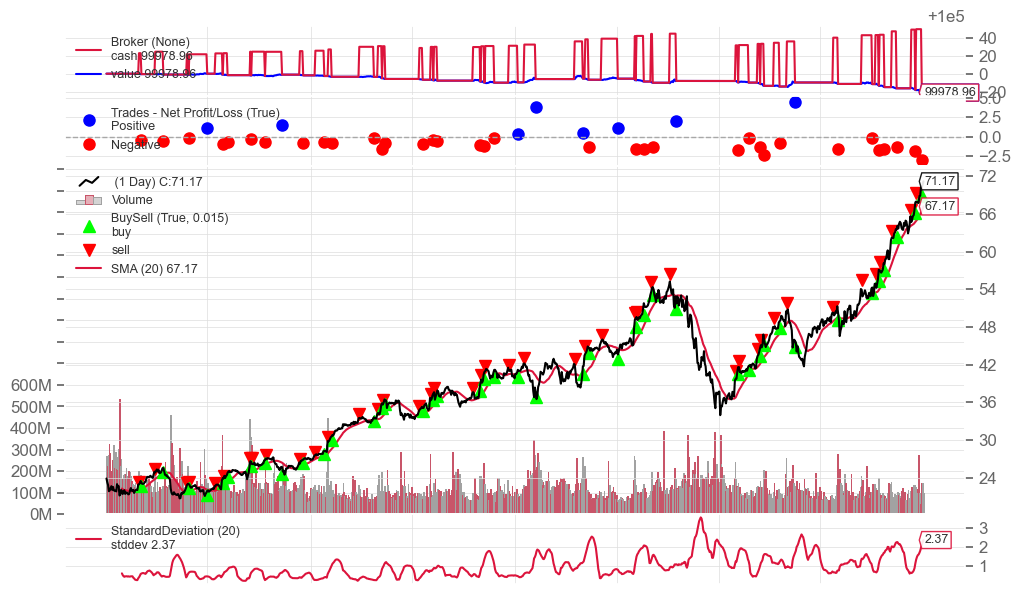

In [73]:
# Set up the backtest engine (Cerebro)
cerebro = bt.Cerebro()

# Add the data feed and the strategy
cerebro.adddata(data_feed)
cerebro.addstrategy(ShortingStrategy)

cerebro.broker.setcash(100000)  # Initial cash
cerebro.broker.setcommission(commission=0.001)  # Commission per trade

# Run the backtest
cerebro.run()

import matplotlib.pyplot as plt

# After running cerebro.run()
%matplotlib inline
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
cerebro.plot()
plt.show()

In [74]:
final_cash = cerebro.broker.get_cash()
print(f"Final cash value: {final_cash}")

Final cash value: 99978.9556595978
